In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
data=pd.read_csv('Social_ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
x=data.iloc[:, [2,3]].values
y=data.iloc[:, 4].values

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [33]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [34]:
y_pred=classifier.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1], dtype=int64)

In [35]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[63,  5],
       [ 4, 28]], dtype=int64)

In [36]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_test,y_pred)
ac

0.91

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


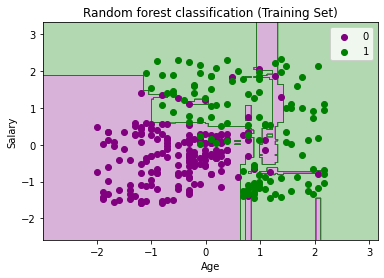

In [40]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_train,y_train
x1,x2=np.meshgrid(np.arange(start=x_set[:, 0].min()-1,stop=x_set[:, 0].max()+1,step=0.01),
                 np.arange(start=x_set[:, 1].min()-1,stop=x_set[:, 1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            cmap=ListedColormap(('purple','green')),alpha=0.3)
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('purple','green'))(i),label=j)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Random forest classification (Training Set)')
plt.legend()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


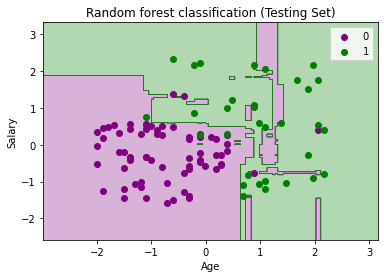

In [41]:
from matplotlib.colors import ListedColormap
x_set,y_set=x_test,y_test
x1,x2=np.meshgrid(np.arange(start=x_set[:, 0].min()-1,stop=x_set[:, 0].max()+1,step=0.01),
                 np.arange(start=x_set[:, 1].min()-1,stop=x_set[:, 1].max()+1,step=0.01))
plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            cmap=ListedColormap(('purple','green')),alpha=0.3)
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
               c=ListedColormap(('purple','green'))(i),label=j)
plt.xlim(x1.min(),x1.max())
plt.ylim(x2.min(),x2.max())
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Random forest classification (Testing Set)')
plt.legend()

In [42]:
#Now we will make prediction with our model
#first we will transform the input and then make prediction 

In [43]:
p=sc.transform([[55,45000]])
classifier.predict(p)

array([1], dtype=int64)

In [44]:
q=sc.transform([[19,45000]])
classifier.predict(q)

array([0], dtype=int64)

In [47]:
r=sc.transform([[28,50000]])
classifier.predict(r)

array([0], dtype=int64)